# FIFA World Cup 2022 Predictions
----
![FIFA World Cup 2022](https://seeklogo.com/images/F/fifa-world-cup-2022-logo-0E5F05028D-seeklogo.com.png)


## Description
Data analysis and prediction of FIFA World Cup 2022 matches using machine learning approach and simulation

## Datasets:
* [FIFA World Cup 2018 Dataset on Kaggle](https://www.kaggle.com/ahmedelnaggar/fifa-worldcup-2018-dataset)
* [FIFA Ranking for men's national teams (Dec 1992 - Oct 2022)](https://www.kaggle.com/datasets/cashncarry/fifaworldranking)
* [International football results from 1872 to 2022(Before FIFA World Cup](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017)

## References
----
* Soccer World Cup 2018 Winner [by Dr. James Bond](https://www.kaggle.com/agostontorok/soccer-world-cup-2018-winner)
* FIFA - May the force be with the strongest team [by Wei Chun Chang](https://www.kaggle.com/justjun0321/fifa-may-the-force-be-with-the-strongest-team)
* World Cup Winner Prediction 2018
 [by MJeremy](https://www.kaggle.com/zhangyue199/world-cup-winner-prediction-2018)
* [Christian Wibisono](https://www.kaggle.com/christianwbsn)

## World Cup 2018 Analysis
----
### Importing Libraries for EDA and Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import numpy as np
import seaborn as sns

### Loading dataset to dataframe

In [2]:
# Historical FIFA rankings dataframe
historical_rankings = pd.read_csv('../input/fifa_ranking-2022-10-06.csv')
# Historical match between 2 teams dataframe
historical_matches = pd.read_csv('../input/results_before2022WC.csv')
world_cup = pd.read_csv('../input/world_cup_2022.csv')

In [3]:
historical_rankings = historical_rankings.replace({'IR Iran': 'Iran'})
historical_matches = historical_matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
world_cup = world_cup.set_index('Team')
historical_rankings['country_full'] = historical_rankings['country_full'].replace('USA','United States')
historical_rankings['country_full'] = historical_rankings['country_full'].replace('Korea Republic','South Korea')
historical_rankings[historical_rankings.country_full == 'United States']


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
79,24,United States,USA,43.00,0.00,0,CONCACAF,1992-12-31
232,28,United States,USA,44.00,43.00,4,CONCACAF,1993-08-08
382,26,United States,USA,45.00,44.00,-2,CONCACAF,1993-09-23
484,26,United States,USA,45.00,45.00,0,CONCACAF,1993-10-22
685,27,United States,USA,45.00,45.00,1,CONCACAF,1993-11-19
...,...,...,...,...,...,...,...,...
62923,13,United States,USA,1643.34,1648.51,2,CONCACAF,2022-02-10
63216,15,United States,USA,1633.72,1643.34,2,CONCACAF,2022-03-31
63359,14,United States,USA,1635.01,1633.72,-1,CONCACAF,2022-06-23
63639,14,United States,USA,1635.01,1635.01,0,CONCACAF,2022-08-25


### 1. Exploratory Data Analysis
----

In [4]:
print("Historical FIFA Rankings:")
print(historical_rankings.info())
print("--------------------------------")
print("Historical matches")
print(historical_matches.info())

Historical FIFA Rankings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB
None
--------------------------------
Historical matches
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44158 entries, 0 to 44157
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44158 non-null  object
 1   home_team   44158 non-null  object
 2   away_team   44

* ## Historical Rankings data

In [5]:
# Processing rankings data
historical_rankings = historical_rankings.loc[:,['rank', 'country_full','country_abrv', 'total_points', 'confederation', 'rank_date']]
historical_rankings['rank_date'] = pd.to_datetime(historical_rankings['rank_date'])
historical_rankings = historical_rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()
historical_rankings.head()

,rank_date,rank,country_full,country_abrv,total_points,confederation
0,2003-01-15,204.0,Afghanistan,AFG,7.0,AFC
1,2003-01-16,204.0,Afghanistan,AFG,7.0,AFC
2,2003-01-17,204.0,Afghanistan,AFG,7.0,AFC
3,2003-01-18,204.0,Afghanistan,AFG,7.0,AFC
4,2003-01-19,204.0,Afghanistan,AFG,7.0,AFC


In [6]:
historical_rankings_by_team = historical_rankings.groupby([historical_rankings.rank_date.dt.year,historical_rankings.country_full]).mean()
historical_rankings_by_team = historical_rankings_by_team.reset_index()
historical_rankings_by_team


,rank_date,country_full,rank,total_points
0,1992,Albania,86.000000,14.000000
1,1992,Algeria,30.000000,39.000000
2,1992,Angola,102.000000,10.000000
3,1992,Antigua and Barbuda,109.000000,8.000000
4,1992,Argentina,10.000000,51.000000
...,...,...,...,...
6229,2022,Vietnam,97.014337,1216.872115
6230,2022,Wales,18.874552,1582.563011
6231,2022,Yemen,151.767025,1037.620430
6232,2022,Zambia,87.548387,1267.099176


Top 10 Averaged World Rank since 1992


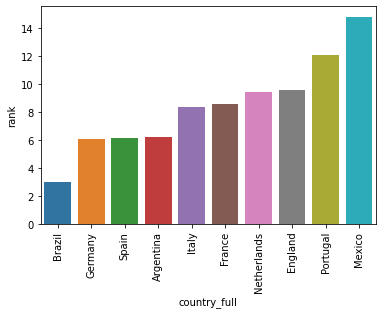

In [7]:
print("Top 10 Averaged World Rank since 1992")
historical_rankings_by_team_top10 = historical_rankings_by_team.groupby(['country_full']).mean().sort_values(by=['rank'])['rank'][:10].reset_index()
#historical_rankings_by_team_top10['country_full']
sns.barplot(x = 'country_full',
            y = 'rank',
            data = historical_rankings_by_team_top10)
plt.xticks(rotation=90)
plt.show()


Top 32 Teams Averaged World Rank That Failed to Qualify to World Cup 2022


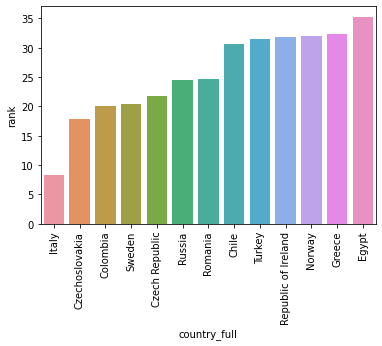

In [8]:
print("Top 32 Teams Averaged World Rank That Failed to Qualify to World Cup 2022")
top_32 = historical_rankings_by_team.groupby(['country_full']).mean().sort_values(by=['rank'])['rank'][:32].reset_index()
not_in_world_cup_2022 = top_32[~top_32['country_full'].isin(world_cup.index.unique())]
sns.barplot(x = 'country_full',
            y = 'rank',
            data = not_in_world_cup_2022)
plt.xticks(rotation=90)
plt.show()

In [9]:
world_cup_participants = historical_rankings_by_team[historical_rankings_by_team['country_full'].isin(world_cup.index.unique())]['country_full'].unique()
trace = []
for team in world_cup_participants:
    trace.append(go.Scatter(
            x = historical_rankings_by_team[historical_rankings_by_team['country_full'] == team]['rank_date'],
            y = historical_rankings_by_team[historical_rankings_by_team['country_full'] == team]['rank'],
            mode = "lines",
            name = team))
layout = dict(title = 'FIFA Rank of World Cup 2022 Participants From 1993-2022',
             xaxis = dict(title= 'Rank Date', dtick=6,),
             yaxis = dict(title= 'Rank', dtick=10, autorange='reversed'),
             height = 800
             )
fig = dict(data = trace, layout = layout)
iplot(fig)

* ## Historical Matches data

In [10]:
# Processing matches data
historical_matches['date'] = pd.to_datetime(historical_matches['date'])
historical_matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
print("Biggest score margin in history:")
historical_matches['score_diff'] = abs(historical_matches['home_score'] - historical_matches['away_score'])
historical_matches[historical_matches['score_diff'] == historical_matches['score_diff'].max()].head()

Biggest score margin in history:


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff
24123,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31


#### Calculating Elo Rating
* [Elo Rating System](https://en.wikipedia.org/wiki/Elo_rating_system) is  is a method for calculating the relative skill levels of players in zero-sum games such as chess. It is named after its creator Arpad Elo, a Hungarian-American physics professor.

In [12]:
def get_result(df):
    if df['home_score'] > df['away_score']:
        return 1
    elif df['home_score'] == df['away_score']:
        return 0.5
    else:
        return 0
historical_matches['result'] = historical_matches.apply(get_result, axis=1)
historical_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0.5
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,1.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,1.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0.5
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44153,2022-11-20,Slovenia,Montenegro,1,0,Friendly,Ljubljana,Slovenia,False,1,1.0
44154,2022-11-20,South Africa,Angola,1,1,Friendly,Mbombela,South Africa,False,0,0.5
44155,2022-11-20,Saint Lucia,San Marino,1,0,Friendly,Gros Islet,Saint Lucia,False,1,1.0
44156,2022-11-20,Syria,Venezuela,1,2,Friendly,Dubai,United Arab Emirates,True,1,0.0


In [13]:
teams_df = pd.unique(historical_matches[['home_team', 'away_team']].values.ravel('K'))
teams_df = pd.DataFrame({'team': teams_df})
teams_df['elo'] = 1500
#teams_df.loc[teams_df["team"] == "United States", "team"] = "USA"
#teams_df.loc[teams_df["team"] == "USA"]
#teams_df['team'] = teams_df['team'].replace('United States', 'USA')
teams_df

,team,elo
0,Scotland,1500
1,England,1500
2,Wales,1500
3,Northern Ireland,1500
4,United States,1500
...,...,...
311,Asturias,1500
312,Crimea,1500
313,Two Sicilies,1500
314,Surrey,1500


In [14]:
def expected(A, B):
    """
    Calculate expected score of A in a match against B
    :param A: Elo rating for player A
    :param B: Elo rating for player B
    """
    return 1 / (1 + 10 ** ((B - A) / 400))


def elo(old, exp, score, k=30):
    """
    Calculate the new Elo rating for a player
    :param old: The previous Elo rating
    :param exp: The expected score for this match
    :param score: The actual score for this match
    :param k: The k-factor for Elo (default: 30)
    """
    return old + k * (score - exp)

In [15]:
teams_df.set_index('team', inplace=True)
elo_ratings_home, elo_ratings_away = [], []
for index, row in historical_matches.iterrows():
    elo_home = teams_df['elo'].loc[row['home_team']]
    elo_away = teams_df['elo'].loc[row['away_team']]
    
    new_elo_home = elo(elo_home, expected(elo_home,elo_away),row['result'])
    new_elo_away = elo(elo_away, expected(elo_away,elo_home),(row['result']-1)*-1)

    teams_df['elo'].loc[row['home_team']] = new_elo_home
    teams_df['elo'].loc[row['away_team']] = new_elo_away
    
    elo_ratings_home.append(new_elo_home)
    elo_ratings_away.append(new_elo_away)
    
historical_matches['home_elo'] = elo_ratings_home
historical_matches['away_elo'] = elo_ratings_away

Top 10 Teams Based on Elo Rating


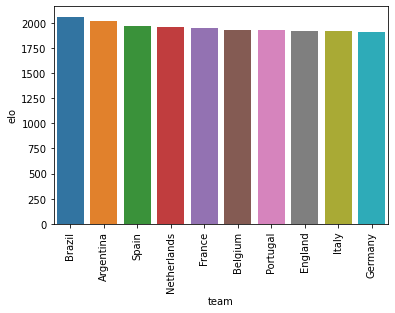

In [16]:
print("Top 10 Teams Based on Elo Rating")
elo_ratings_top10 = teams_df.sort_values(by=['elo'], ascending=False)[:10].reset_index()
sns.barplot(x = 'team',
            y = 'elo',
            data = elo_ratings_top10)
plt.xticks(rotation=90)
plt.show()

* ## World Cup 2018 Data

In [17]:
# Processing world cup data
world_cup = world_cup.reset_index()
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.set_index('Team')
world_cup

,Group,First match \nagainst,Second match\n against,Third match\n against
Team,,,,
Qatar,A,Ecuador,Senegal,Netherlands
Ecuador,A,Qatar,Netherlands,Senegal
Senegal,A,Netherlands,Qatar,Ecuador
Netherlands,A,Senegal,Ecuador,Qatar
England,B,Iran,United States,Wales
Iran,B,England,Wales,United States
United States,B,Wales,England,Iran
Wales,B,United States,Iran,England
Argentina,C,Saudi Arabia,Mexico,Poland


In [18]:
print("World Cup 2022 Data")
print(world_cup.info())

World Cup 2022 Data
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Qatar to South Korea
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Group                  32 non-null     object
 1   First match 
against   32 non-null     object
 2   Second match
 against  32 non-null     object
 3   Third match
 against   32 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


In [19]:
world_cup_rankings = historical_rankings.loc[(historical_rankings['rank_date'] == historical_rankings['rank_date'].max()) & 
                                    historical_rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
print('World Cup 2022 Participant Latest FIFA Rank')
world_cup_rankings.sort_values(by='rank')

World Cup 2022 Participant Latest FIFA Rank


,rank_date,rank,country_abrv,total_points,confederation
country_full,,,,,
Brazil,2022-10-06,1.0,BRA,1841.30,CONMEBOL
Belgium,2022-10-06,2.0,BEL,1816.71,UEFA
Argentina,2022-10-06,3.0,ARG,1773.88,CONMEBOL
France,2022-10-06,4.0,FRA,1759.78,UEFA
England,2022-10-06,5.0,ENG,1728.47,UEFA
Spain,2022-10-06,7.0,ESP,1715.22,UEFA
Netherlands,2022-10-06,8.0,NED,1694.51,UEFA
Portugal,2022-10-06,9.0,POR,1676.56,UEFA
Denmark,2022-10-06,10.0,DEN,1666.57,UEFA


In [20]:
by_confederation = world_cup_rankings.groupby('confederation').mean().reset_index().sort_values(by='total_points')
traces = go.Bar(
            x = by_confederation['confederation'],
            y = by_confederation['total_points'],
            text = by_confederation['confederation'])
data = [traces]
layout = go.Layout()
fig = go.Figure(data = data, layout = layout)
print("Averaged FIFA Points Group By Confederation")
iplot(fig)

Averaged FIFA Points Group By Confederation


In [21]:
world_cup_rankings = historical_rankings.loc[(historical_rankings['rank_date'] == historical_rankings['rank_date'].max()) & 
                                    historical_rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings


,rank_date,rank,country_abrv,total_points,confederation
country_full,,,,,
Argentina,2022-10-06,3.0,ARG,1773.88,CONMEBOL
Australia,2022-10-06,38.0,AUS,1488.72,AFC
Belgium,2022-10-06,2.0,BEL,1816.71,UEFA
Brazil,2022-10-06,1.0,BRA,1841.30,CONMEBOL
Cameroon,2022-10-06,43.0,CMR,1471.44,CAF
Canada,2022-10-06,41.0,CAN,1475.00,CONCACAF
Costa Rica,2022-10-06,31.0,CRC,1503.59,CONCACAF
Croatia,2022-10-06,12.0,CRO,1645.64,UEFA
Denmark,2022-10-06,10.0,DEN,1666.57,UEFA


In [22]:
world_cup_elo = teams_df.loc[teams_df.index.isin(world_cup.index)].sort_values(by=['team'])
world_cup_rankings['elo_ratings'] = world_cup_elo.loc[:,['elo']] 
world_cup_rankings = world_cup_rankings.merge(world_cup.loc[:,['Group']], left_index=True, right_index=True)
world_cup_rankings.sort_values(by=['Group','elo_ratings'],ascending=False)[['Group', 'elo_ratings']]
by_group = world_cup_rankings.groupby('Group').std()
by_group['total'] = (by_group['total_points'] / by_group['total_points'].max()) + (by_group['elo_ratings'] / by_group['elo_ratings'].max())
print("Group Competitiveness")
by_group.sort_values(by='total')

Group Competitiveness


,rank,total_points,elo_ratings,total
Group,,,,
B,6.879922,76.115788,67.204311,0.887082
E,11.176612,94.029559,102.208234,1.210958
A,20.199010,117.540910,102.522929,1.362329
F,16.640813,145.442776,79.440311,1.401258
D,16.114176,130.083948,102.941728,1.444588
H,23.423635,127.216451,123.805096,1.551513
C,20.758532,142.829827,138.412560,1.738408
G,17.473790,157.284683,166.699706,2.000000


* We can measure the competitiveness by calculating the standard deviation of the scaled parameter(rank_average, total_points_average, and elo_ratings_average) in each group 
Group with smaller deviation should be more competitive than the other

In [23]:
# Merging historical matches and historical rank
historical_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,result,home_elo,away_elo
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0.5,1500.000000,1500.000000
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,1.0,1515.000000,1485.000000
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,1.0,1501.291995,1498.708005
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0.5,1498.819563,1501.180437
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1.0,1516.078511,1483.921489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44153,2022-11-20,Slovenia,Montenegro,1,0,Friendly,Ljubljana,Slovenia,False,1,1.0,1668.796534,1553.900260
44154,2022-11-20,South Africa,Angola,1,1,Friendly,Mbombela,South Africa,False,0,0.5,1618.267375,1511.069532
44155,2022-11-20,Saint Lucia,San Marino,1,0,Friendly,Gros Islet,Saint Lucia,False,1,1.0,1321.147586,1005.532763
44156,2022-11-20,Syria,Venezuela,1,2,Friendly,Dubai,United Arab Emirates,True,1,0.0,1499.389849,1681.219568


In [24]:
historical_matches = historical_matches.merge(historical_rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
historical_matches = historical_matches.merge(historical_rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))


In [25]:
historical_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,...,country_full_home,country_abrv_home,total_points_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,confederation_away
0,2000-02-03,Scotland,Wales,5,2,British Home Championship,Aberdeen,Scotland,False,3,...,Scotland,SCO,638.00,UEFA,2000-02-03,98.0,Wales,WAL,389.00,UEFA
1,2000-02-24,Wales,Northern Ireland,2,0,British Home Championship,Llandudno,Wales,False,2,...,Wales,WAL,388.00,UEFA,2000-02-24,88.0,Northern Ireland,NIR,425.00,UEFA
2,2000-03-03,Northern Ireland,Scotland,0,3,British Home Championship,Belfast,Ireland,False,3,...,Northern Ireland,NIR,425.00,UEFA,2000-03-03,20.0,Scotland,SCO,636.00,UEFA
3,2000-03-17,Northern Ireland,England,0,2,British Home Championship,Dublin,Ireland,False,2,...,Northern Ireland,NIR,431.00,UEFA,2000-03-17,11.0,England,ENG,693.00,UEFA
4,2000-03-26,Wales,England,1,1,British Home Championship,Cardiff,Wales,False,0,...,Wales,WAL,399.00,UEFA,2000-03-26,11.0,England,ENG,693.00,UEFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,2,...,Norway,NOR,1488.57,UEFA,2022-09-27,25.0,Serbia,SRB,1549.53,UEFA
23198,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,0,...,Sweden,SWE,1563.44,UEFA,2022-09-27,65.0,Slovenia,SVN,1372.48,UEFA
23199,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,4,...,Kosovo,KOS,1183.90,UEFA,2022-09-27,108.0,Cyprus,CYP,1180.52,UEFA
23200,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False,2,...,Greece,GRE,1441.45,UEFA,2022-09-27,58.0,Northern Ireland,NIR,1399.10,UEFA


In [26]:
historical_matches['rank_difference'] = historical_matches['rank_home'] - historical_matches['rank_away']
historical_matches['average_rank'] = (historical_matches['rank_home'] + historical_matches['rank_away'])/2
historical_matches['point_difference'] = historical_matches['total_points_home'] - historical_matches['total_points_away']
historical_matches['score_difference'] = historical_matches['home_score'] - historical_matches['away_score']
historical_matches['is_won'] = historical_matches['score_difference'] > 0 # take draw as lost
historical_matches['is_stake'] = historical_matches['tournament'] != 'Friendly'
historical_matches['elo_difference'] = historical_matches['home_elo'] - historical_matches['away_elo']
# I tried earlier rest days but it did not turn to be useful
max_rest = 30
#historical_matches['rest_days'] = historical_matches.groupby('home_team').diff()['date'].dt.days.clip(0,max_rest).fillna(max_rest)

# I tried earlier the team as well but that did not make a difference either
historical_matches['wc_participant'] = historical_matches['home_team'] * historical_matches['home_team'].isin(world_cup.index.tolist())
historical_matches['wc_participant'] = historical_matches['wc_participant'].replace({'':'Other'})
historical_matches = historical_matches.join(pd.get_dummies(historical_matches['wc_participant']))

In [27]:
historical_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_diff,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,2000-02-03,Scotland,Wales,5,2,British Home Championship,Aberdeen,Scotland,False,3,...,0,0,0,0,0,0,0,0,0,0
1,2000-02-24,Wales,Northern Ireland,2,0,British Home Championship,Llandudno,Wales,False,2,...,0,0,0,0,0,0,0,0,0,1
2,2000-03-03,Northern Ireland,Scotland,0,3,British Home Championship,Belfast,Ireland,False,3,...,0,0,0,0,0,0,0,0,0,0
3,2000-03-17,Northern Ireland,England,0,2,British Home Championship,Dublin,Ireland,False,2,...,0,0,0,0,0,0,0,0,0,0
4,2000-03-26,Wales,England,1,1,British Home Championship,Cardiff,Wales,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23197,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,2,...,0,0,0,0,0,0,0,0,0,0
23198,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,0,...,0,0,0,0,0,0,0,0,0,0
23199,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,4,...,0,0,0,0,0,0,0,0,0,0
23200,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False,2,...,0,0,0,0,0,0,0,0,0,0


In [28]:
historical_matches.to_excel("historical_matches.xlsx")

### Modelling

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



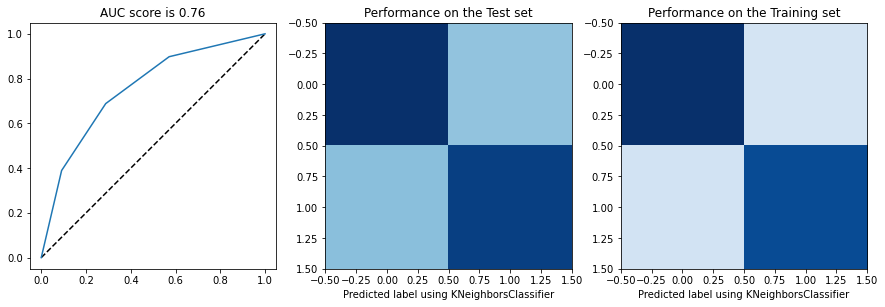

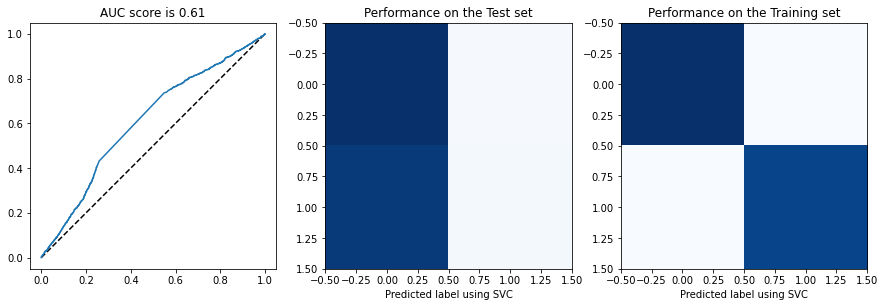

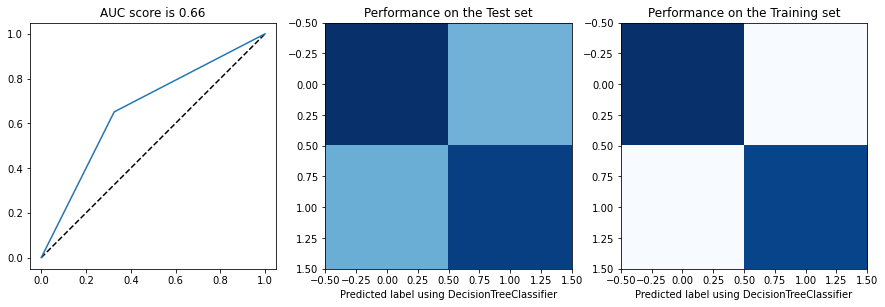

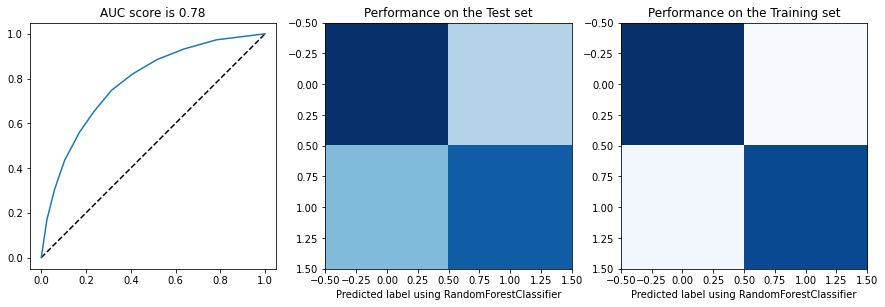

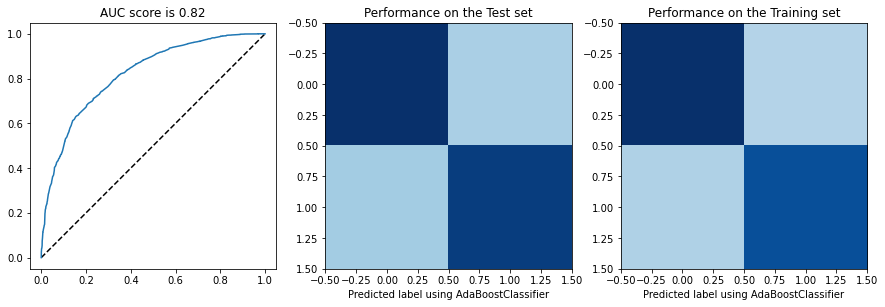

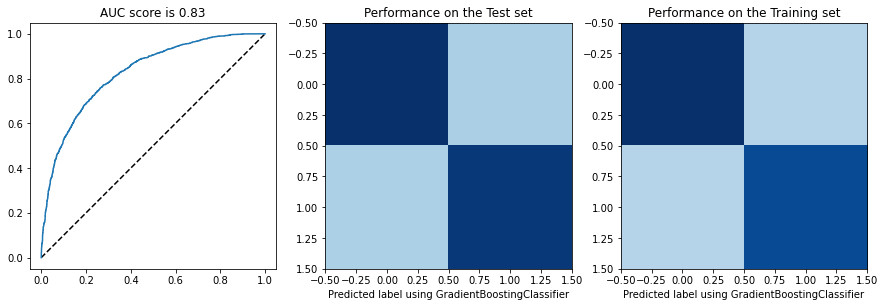

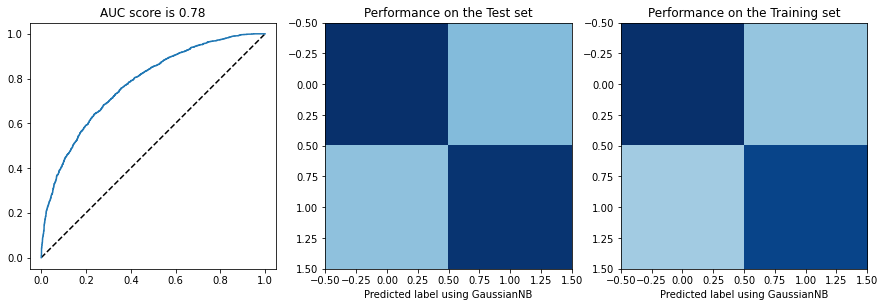

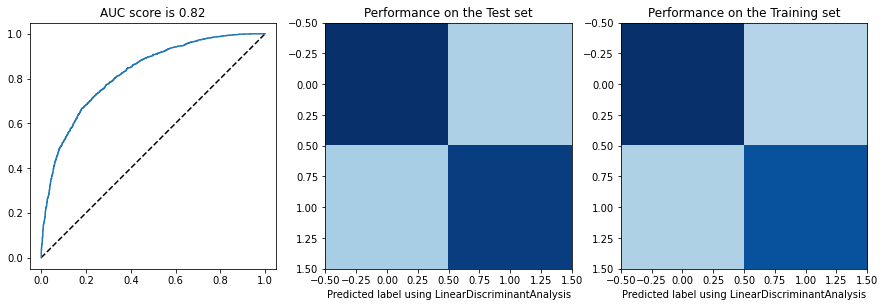

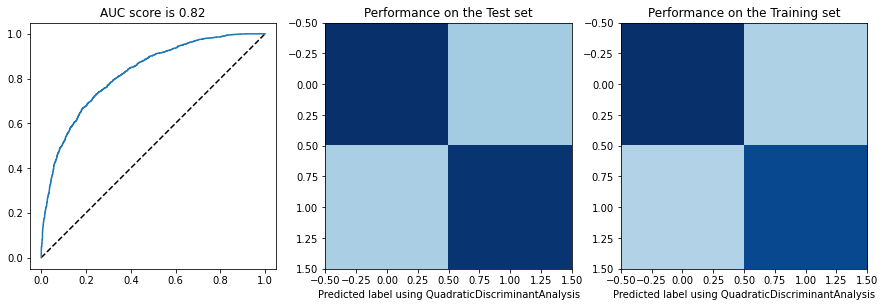

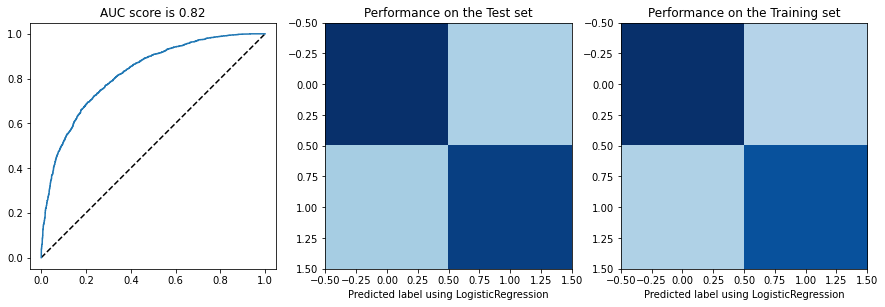

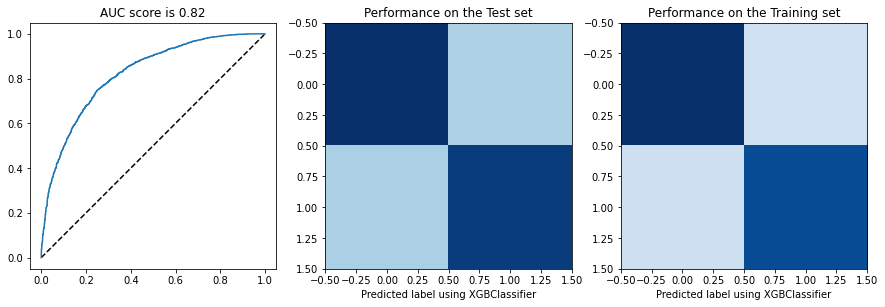

In [29]:
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
#from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    #LGBMClassifier(),
]

X, y = historical_matches.loc[:,['average_rank', 'rank_difference', 'point_difference','elo_difference', 'is_stake']], historical_matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

# Loop to do fit and predictions of each classifier into the dataset
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    # figures 
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,3,1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
    ax.set_aspect(1)

    ax = plt.subplot(1,3,2)
    cm = confusion_matrix(y_test, clf.predict(X_test))
    ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

    ax.set_xlabel('Predicted label using ' + name)
    ax.set_title('Performance on the Test set')

    ax = plt.subplot(1,3,3)
    cm = confusion_matrix(y_train, clf.predict(X_train))
    ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
    ax.set_xlabel('Predicted label using ' + name)
    ax.set_title('Performance on the Training set')
    pass
    
    # Storing each score into a dict
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

# Storing the results in a DataFrame to be visualized
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

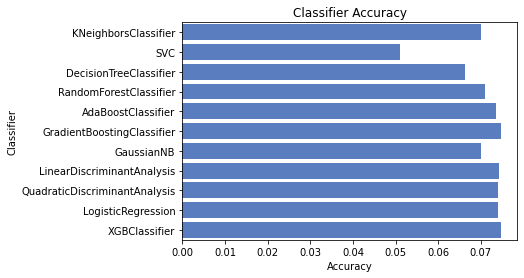

In [30]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [31]:
log.sort_values(by=['Accuracy'], ascending=False)

,Classifier,Accuracy
0,XGBClassifier,0.074790
0,GradientBoostingClassifier,0.074661
0,LinearDiscriminantAnalysis,0.074294
0,LogisticRegression,0.074079
0,QuadraticDiscriminantAnalysis,0.073993
0,AdaBoostClassifier,0.073648
0,RandomForestClassifier,0.070933
0,KNeighborsClassifier,0.070028
0,GaussianNB,0.069942
0,DecisionTreeClassifier,0.066279


In [32]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
#qda_model = QuadraticDiscriminantAnalysis()
#qda_model.fit(X_train, y_train)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [33]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']
margin = 0.05
world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in sorted(set(world_cup['Group'])):
    print('___Group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        home_elo = world_cup_rankings.loc[home, 'elo_ratings']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        opp_elo = world_cup_rankings.loc[away, 'elo_ratings']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['elo_difference'] = home_elo - opp_elo
    
        home_win_prob = xgb_model.predict_proba(row)[:,1][0] * 0.5 + gb_model.predict_proba(row)[:,1][0] * 0.5
        
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Group A:___
Qatar vs. Ecuador: Ecuador wins with 0.70
Qatar vs. Senegal: Senegal wins with 0.58
Qatar vs. Netherlands: Netherlands wins with 0.93
Ecuador vs. Senegal: Ecuador wins with 0.57
Ecuador vs. Netherlands: Netherlands wins with 0.76
Senegal vs. Netherlands: Netherlands wins with 0.94
___Group B:___
England vs. Iran: Draw
England vs. United States: Draw
England vs. Wales: England wins with 0.75
Iran vs. United States: Draw
Iran vs. Wales: Iran wins with 0.70
United States vs. Wales: United States wins with 0.55
___Group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.86
Argentina vs. Mexico: Argentina wins with 0.92
Argentina vs. Poland: Argentina wins with 0.87
Saudi Arabia vs. Mexico: Mexico wins with 0.65
Saudi Arabia vs. Poland: Poland wins with 0.74
Mexico vs. Poland: Poland wins with 0.76
___Group D:___
France vs. Australia: France wins with 0.77
France vs. Denmark: Draw
France vs. Tunisia: France wins with 0.85
Australia vs. Denmark: Denmark wins with 0.82
Aus

In [34]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
print("_____Qualified Teams______\n")
print(next_round_wc.loc[:,['Group','Team','points','total_prob']])
print("\n")
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

print("_____Knockout Phase______")
finals = ['Round_of_16', 'Quarterfinal', 'Semifinal', 'Final']

labels = list()
odds = list()

for f in finals:
    print("___{}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        home_elo = world_cup_rankings.loc[home, 'elo_ratings']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        opp_elo = world_cup_rankings.loc[away, 'elo_ratings']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['elo_difference'] = home_elo - opp_elo
        
        elo_prob = expected(home_elo,opp_elo)
        home_win_prob =  xgb_model.predict_proba(row)[:,1][0] * 0.5 + gb_model.predict_proba(row)[:,1][0] * 0.5
        
        if home_win_prob <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

_____Qualified Teams______

   Group         Team  points  total_prob
0      A  Netherlands       9    2.628306
1      A      Ecuador       6    1.509918
2      B      England       5    1.743371
3      B         Iran       5    1.737858
4      C    Argentina       9    2.657467
5      C       Poland       6    1.628325
6      D       France       7    2.128451
7      D      Denmark       7    1.973625
8      E      Germany       7    2.087955
9      E        Spain       7    2.080943
10     F      Croatia       9    2.096871
11     F      Belgium       4    1.643571
12     G       Brazil       9    2.639516
13     G  Switzerland       6    1.493959
14     H  South Korea       9    2.203866
15     H     Portugal       4    1.799904


_____Knockout Phase______
___Round_of_16___
Netherlands vs. Iran: Netherlands wins with probability 0.63
Argentina vs. Denmark: Argentina wins with probability 0.71
Germany vs. Belgium: Belgium wins with probability 0.63
Brazil vs. Portugal: Brazil wins wi